# K-Means 手写体识别

基于 sklearn 演示用 K-Means 完成手写体识别任务

本实例来自 Python Data Science Handbook：[In Depth: k-Means Clustering](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)

主要还是通过 sklearn 来了解 K-Means 用法。

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

## 加载数据

1,797 样本，64 特征（8×8 图像）

In [2]:
digits = load_digits()

In [3]:
print(type(digits))
print(digits.data.shape)

<class 'sklearn.utils.Bunch'>
(1797, 64)


## K-Means

一般有 0-9 一共 10 个数字，所以分十个聚类。

In [4]:
# KMean
kmeans = KMeans(n_clusters=10, random_state=0)

# 喂数据
clusters = kmeans.fit_predict(digits.data)

In [5]:
# 10 个聚类。64 维度。
kmeans.cluster_centers_.shape

(10, 64)

可视化聚类中心，可见除了 1 和 8 比较难分辨，其它都还行。

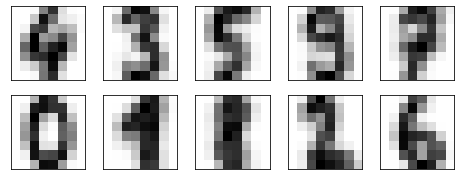

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

## 评估

K-means 是无监督的，并没有 label，所以聚类后并不知道哪个类是 1-9 中的一个。现在需要生成一个相对应的了 labels 数据集。

In [7]:
import numpy as np
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    # 如果是该数字，标记
    mask = (clusters == i)
    # 获取 label 相对于标记位置的值
    labels[mask] = mode(digits.target[mask])[0] 

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(digits.target, labels)

0.7935447968836951

### 查看对应混淆矩阵

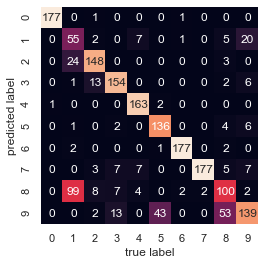

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()  # for plot styling

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## 用 t-SNE 改进

用 T-distributed Stochastic Neighbor Embedding (t-SNE) 算法对数据进行预处理，再使用 K-means。

In [10]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9326655537006121